<a href="https://colab.research.google.com/github/MarioCass10/Data-Science-Final-Project/blob/main/Grafico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

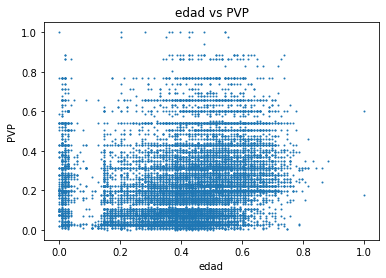

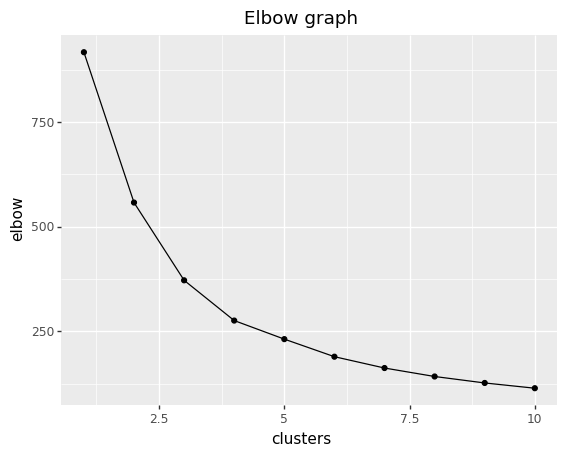


[[0.06271191 0.26602602]
 [0.4694019  0.09886203]
 [0.47676229 0.58630873]
 [0.29273838 0.11747461]
 [0.54564644 0.29676382]]


"min_max_scaler = preprocessing.MinMaxScaler()\ndatos_escalados = min_max_scaler.fit_transform(le)\ndatos_escalados = pd.DataFrame(datos_escalados) # Hay que convertir a DF el resultado.\ndatos_escalados = datos_escalados.rename(columns = {0: 'codigo_pais_garantias_nombre', 1: 'genero_cuestionario',2:'edad',3:'tipo_venta_agrupado_garantia'})\n\n#Representación gráfica de los datos.\nx = datos_escalados['Attack'].values\ny = datos_escalados['Defense'].values\nplt.xlabel('Attack')\nplt.ylabel('Defense')\nplt.title('Attack vs Speed')\nplt.plot(x,y,'o',markersize=1)"

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Carga del dataframe.
datos = pd.read_excel("/content/DataClusterizacion.xlsx")
datoskmeans = datos.loc[:,["edad","PVP"]]

#Se eliminan filas que tengan valor NaN.
datoskmeans = datoskmeans.dropna()
datoskmeans = datoskmeans.reset_index(drop=True)

#Convertimos variables factor a numerico
'''conversortype1 = preprocessing.LabelEncoder()
conversortype1.fit(datos..astype(str))
datos["type1numerico"] = conversortype1.transform(datos.Type1.astype(str))'''

#Normalización de los datos.
min_max_scaler = preprocessing.MinMaxScaler()
datos_escalados = min_max_scaler.fit_transform(datoskmeans)
datos_escalados = pd.DataFrame(datos_escalados) # Hay que convertir a DF el resultado.
datos_escalados = datos_escalados.rename(columns = {0: 'edad', 1: 'PVP'})

#Representación gráfica de los datos.
x = datos_escalados['edad'].values
y = datos_escalados['PVP'].values
plt.xlabel('edad')
plt.ylabel('PVP')
plt.title('edad vs PVP')
plt.plot(x,y,'o',markersize=1)

#Curva elbow para determinar valor óptimo de k.
from plotnine import *
elbow_values = []
for i in range(1,11,1):
    km = KMeans(n_clusters=i)
    km.fit(datos_escalados)
    elbow_values.append(km.inertia_)
elbow = pd.DataFrame({"clusters":range(1,11,1), "elbow" : elbow_values})    
   
grafico = ggplot(aes(x = "clusters", y ="elbow"),elbow)+geom_line()+geom_point()+ggtitle("Elbow graph")
print(grafico)

#Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(datos_escalados)
centroids = kmeans.cluster_centers_
print(centroids)

'''min_max_scaler = preprocessing.MinMaxScaler()
datos_escalados = min_max_scaler.fit_transform(le)
datos_escalados = pd.DataFrame(datos_escalados) # Hay que convertir a DF el resultado.
datos_escalados = datos_escalados.rename(columns = {0: 'codigo_pais_garantias_nombre', 1: 'genero_cuestionario',2:'edad',3:'tipo_venta_agrupado_garantia'})

#Representación gráfica de los datos.
x = datos_escalados['Attack'].values
y = datos_escalados['Defense'].values
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Speed')
plt.plot(x,y,'o',markersize=1)'''




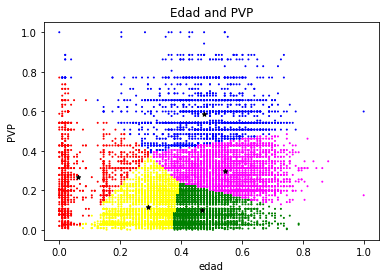

In [ ]:
#Etiquetamos nuestro dataframe.
cluster = kmeans.predict(datos_escalados)
datos ["cluster"] = cluster

#Representación gráfica de los clústeres k-means.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in cluster:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('edad')
plt.ylabel('PVP')
plt.title('Edad and PVP')
plt.show()


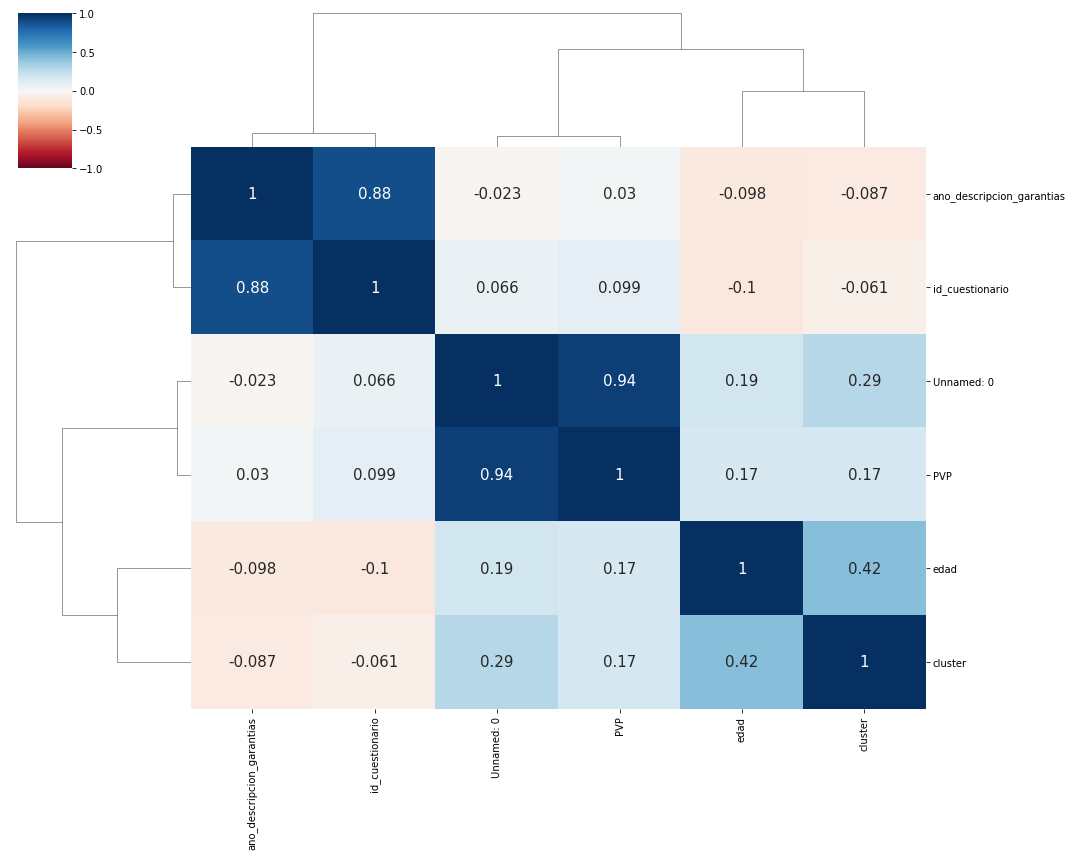

In [ ]:
#Dendograma de correlaciones
import seaborn as sns
correlaciones = datos.corr()
sns.clustermap(correlaciones,method="complete",cmap="RdBu",annot=True,annot_kws={"size":15},vmin=-1, vmax=1,figsize=(15,12))

In [ ]:
#Representación de los clusters en Excel
centroides = datos.groupby(by=("cluster"),as_index=False).mean()
centroides.to_excel("Proyecto1.xlsx")
datos.cluster.value_counts()

4    4427
1    4276
3    3417
2    1769
0    1426
Name: cluster, dtype: int64